In [52]:
import sys 
sys.path.append("../")

In [53]:
import pandas as pd
import plotly.graph_objects as go
from technicals.indicators import RSI
from technicals.patterns import apply_patterns
from plotting import CandlePlot

In [54]:
df_raw = pd.read_pickle("../data/GBP_JPY_H1.pkl")

In [55]:
df_raw.shape

(37224, 14)

In [56]:
# df_an = df_raw.iloc[-6000:].copy() 
df_an = df_raw.copy() 
df_an.reset_index(drop=True,inplace=True)

In [57]:
df_an.shape

(37224, 14)

In [58]:
df_an = RSI(df_an)

In [59]:
df_an.tail()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,RSI_14
37219,2021-12-30 19:00:00+00:00,721,155.312,155.444,155.274,155.444,155.296,155.432,155.260,155.432,155.328,155.458,155.289,155.457,61.286263
37220,2021-12-30 20:00:00+00:00,1001,155.442,155.470,155.289,155.312,155.429,155.458,155.275,155.298,155.456,155.484,155.303,155.326,55.345932
37221,2021-12-30 21:00:00+00:00,638,155.317,155.382,155.286,155.382,155.301,155.362,155.270,155.362,155.333,155.404,155.300,155.402,57.688104
37222,2021-12-30 22:00:00+00:00,623,155.353,155.381,155.282,155.329,155.278,155.315,155.207,155.254,155.428,155.456,155.357,155.404,55.322082
37223,2021-12-30 23:00:00+00:00,419,155.336,155.360,155.284,155.310,155.262,155.329,155.262,155.294,155.411,155.418,155.299,155.327,54.459758


In [60]:
df_an.head()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,RSI_14
0,2016-01-07 00:00:00+00:00,6469,173.525,173.660,173.472,173.578,173.504,173.642,173.452,173.559,173.546,173.683,173.492,173.596,NaN
1,2016-01-07 01:00:00+00:00,20423,173.578,173.762,172.196,172.481,173.560,173.740,172.164,172.457,173.596,173.786,172.226,172.505,NaN
2,2016-01-07 02:00:00+00:00,13481,172.488,172.863,172.406,172.696,172.464,172.842,172.383,172.677,172.513,172.885,172.428,172.716,NaN
3,2016-01-07 03:00:00+00:00,8753,172.703,172.972,172.588,172.928,172.683,172.954,172.568,172.908,172.723,172.992,172.608,172.947,NaN
4,2016-01-07 04:00:00+00:00,6709,172.930,172.974,172.574,172.593,172.910,172.953,172.554,172.575,172.949,173.000,172.593,172.611,NaN


In [61]:
df_an = apply_patterns(df_an)

In [62]:
df_an['EMA_200'] = df_an.mid_c.ewm(span=200, min_periods=200).mean()

In [63]:
df_an.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c', 'RSI_14',
       'body_lower', 'body_upper', 'body_bottom_perc', 'body_top_perc',
       'body_perc', 'direction', 'body_size', 'low_change', 'high_change',
       'body_size_change', 'mid_point', 'mid_point_prev_2', 'body_size_prev',
       'direction_prev', 'direction_prev_2', 'body_perc_prev',
       'body_perc_prev_2', 'HANGING_MAN', 'SHOOTING_STAR', 'SPINNING_TOP',
       'MARUBOZU', 'ENGULFING', 'TWEEZER_TOP', 'TWEEZER_BOTTOM',
       'MORNING_STAR', 'EVENING_STAR', 'EMA_200'],
      dtype='object')

In [64]:
our_cols = ['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'ask_c', 'bid_c', 'ENGULFING', 'direction', 'EMA_200', 'RSI_14']

In [65]:
df_slim = df_an[our_cols].copy()
df_slim.dropna(inplace=True)
df_slim.reset_index(drop=True, inplace=True)

In [66]:
df_slim.head()

,time,mid_o,mid_h,mid_l,mid_c,ask_c,bid_c,ENGULFING,direction,EMA_200,RSI_14
0,2016-01-19 07:00:00+00:00,168.333,168.652,168.319,168.430,168.445,168.415,False,1,169.169546,65.074481
1,2016-01-19 08:00:00+00:00,168.425,168.858,168.334,168.527,168.542,168.512,False,1,169.162163,66.328463
2,2016-01-19 09:00:00+00:00,168.528,169.110,168.346,168.699,168.721,168.677,False,1,169.156849,68.488954
3,2016-01-19 10:00:00+00:00,168.700,168.976,168.670,168.872,168.894,168.851,False,1,169.153587,70.536688
4,2016-01-19 11:00:00+00:00,168.870,169.072,168.838,168.874,168.889,168.858,False,1,169.150389,70.560507


In [67]:
BUY = 1 
SELL = -1
NONE = 0
RSI_LIMIT = 50.0

def apply_signal(row):
    if row.ENGULFING == True:
        if row.direction  == BUY and row.mid_l > row.EMA_200:
            if row.RSI_14 > RSI_LIMIT: 
                return BUY
        if row.direction  == SELL and row.mid_h > row.EMA_200:
            if row.RSI_14 < RSI_LIMIT: 
                return SELL
    return NONE

In [68]:
df_slim["SIGNAL"] = df_slim.apply(apply_signal, axis=1)

In [69]:
df_slim["SIGNAL"].value_counts()

SIGNAL
 0    34247
 1     1768
-1     1010
Name: count, dtype: int64

In [70]:
LOSS_FACTOR = -1.0
PROFIT_FACTOR = 1.5

def apply_take_profit(row):
    if row.SIGNAL != NONE:
        return (row.mid_c - row.mid_o) * PROFIT_FACTOR + row.mid_c
    else:
        return 0.0

def apply_stop_loss(row):
    if row.SIGNAL != NONE:
        return row.mid_o
    else:
        return 0.0

In [71]:
df_slim["TP"] = df_slim.apply(apply_take_profit, axis=1)
df_slim["SL"] = df_slim.apply(apply_stop_loss, axis=1)

In [72]:
df_slim[df_slim.SIGNAL == BUY].head()

,time,mid_o,mid_h,mid_l,mid_c,ask_c,bid_c,ENGULFING,direction,EMA_200,RSI_14,SIGNAL,TP,SL
73,2016-01-22 08:00:00+00:00,168.056,168.676,167.892,168.670,168.685,168.655,True,1,167.648623,72.153802,1,169.5910,168.056
76,2016-01-22 11:00:00+00:00,168.491,168.998,168.482,168.914,168.930,168.897,True,1,167.682724,70.750921,1,169.5485,168.491
79,2016-01-22 14:00:00+00:00,169.140,169.961,169.036,169.932,169.995,169.869,True,1,167.739128,75.417177,1,171.1200,169.140
95,2016-01-25 06:00:00+00:00,169.718,169.998,169.664,169.875,169.893,169.857,True,1,168.028139,63.779533,1,170.1105,169.718
101,2016-01-25 12:00:00+00:00,168.570,169.268,168.570,169.218,169.234,169.201,True,1,168.080973,53.160235,1,170.1900,168.570


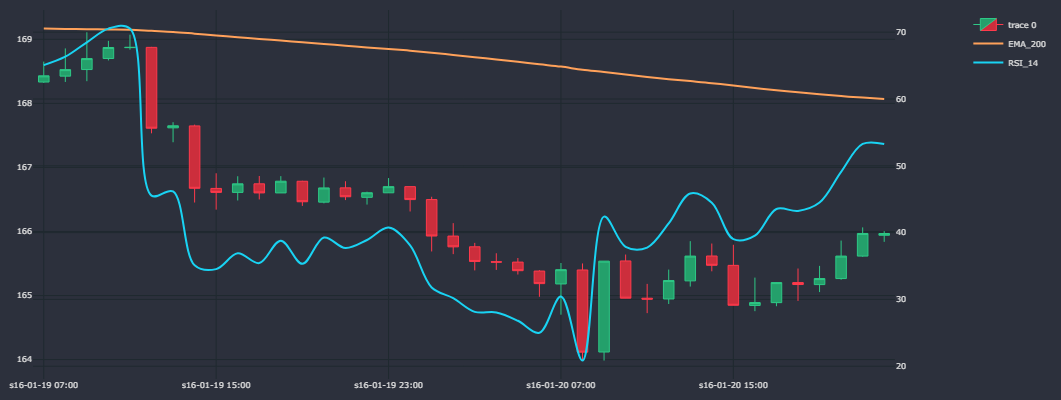

In [73]:
df_plot = df_slim.iloc[0:40]
cp = CandlePlot(df_plot, candles=True)

trades = cp.df_plot[cp.df_plot.SIGNAL != NONE]

markers = ['mid_c', 'TP', 'SL']

marker_colors = ['#0000FF', '#00FF00', '#FF0000']

for i in range(3):
    cp.fig.add_trace(go.Scatter(
        x = trades.sTime,
        y = trades[markers[i]], 
        mode = 'markers',
        marker = dict(color = marker_colors[i], size = 12)
    ))

cp.show_plot(line_traces=["EMA_200"], sec_traces=['RSI_14'])

In [74]:
class Trade:
    def __init__(self, row):
        self.running = True
        self.start_index = row.name
        self.start_price = row.mid_c
        self.trigger_price = row.mid_c
        self.SIGNAL = row.SIGNAL
        self.TP = row.TP
        self.SL = row.SL
        self.result = 0.0
        self.end_time = row.time
        self.start_time = row.time
        self.duration = 0

    
    def close_trade(self, row, result, trigger_price):
        self.running = False
        self.result = result
        self.end_time = row.time
        self.trigger_price = trigger_price
        
    def update(self,row):
        self.duration += 1
        if self.SIGNAL == BUY:
            if row.mid_h >= self.TP:
                self.close_trade(row, PROFIT_FACTOR, row.mid_h)
            elif row.mid_l <= self.SL:
                self.close_trade(row, LOSS_FACTOR, row.mid_l)
        if self.SIGNAL == SELL:
            if row.mid_l <= self.TP:
                self.close_trade(row, PROFIT_FACTOR, row.mid_l)
            elif row.mid_h <= self.SL:
                self.close_trade(row, LOSS_FACTOR, row.mid_h)
        
    

In [75]:
open_trades = []
closed_trades = []

for index, row in df_slim.iterrows():
    for ot in open_trades:
        ot.update(row)
        if ot.running == False:
            closed_trades.append(ot)
    open_trades = [x for x in open_trades if x.running == True]

    if row.SIGNAL != NONE:
        open_trades.append(Trade(row)) 



In [76]:
df_results = pd.DataFrame.from_dict([vars(x) for x in closed_trades])
df_results

,running,start_index,start_price,trigger_price,SIGNAL,TP,SL,result,end_time,start_time,duration
0,False,73,168.670,169.961,1,169.5910,168.056,1.5,2016-01-22 14:00:00+00:00,2016-01-22 08:00:00+00:00,6
1,False,76,168.914,169.961,1,169.5485,168.491,1.5,2016-01-22 14:00:00+00:00,2016-01-22 11:00:00+00:00,3
2,False,79,169.932,168.996,1,171.1200,169.140,-1.0,2016-01-24 23:00:00+00:00,2016-01-22 14:00:00+00:00,9
3,False,95,169.875,169.158,1,170.1105,169.718,-1.0,2016-01-25 07:00:00+00:00,2016-01-25 06:00:00+00:00,1
4,False,101,169.218,168.538,1,170.1900,168.570,-1.0,2016-01-25 13:00:00+00:00,2016-01-25 12:00:00+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...
2769,False,36987,154.406,154.809,1,154.6190,154.264,1.5,2021-12-29 13:00:00+00:00,2021-12-29 10:00:00+00:00,3
2770,False,36998,155.095,155.041,1,155.1685,155.046,-1.0,2021-12-29 22:00:00+00:00,2021-12-29 21:00:00+00:00,1
2771,False,36990,154.680,155.224,1,155.1585,154.361,1.5,2021-12-30 00:00:00+00:00,2021-12-29 13:00:00+00:00,11
2772,False,37006,155.192,155.132,1,155.2580,155.148,-1.0,2021-12-30 06:00:00+00:00,2021-12-30 05:00:00+00:00,1


In [78]:
df_results.result.sum()

26.0